# Assignment 1 - EE229

## Subham Agrawal (23B3919) and Himansu Sahu (23B3972)

In [12]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from scipy.signal import convolve
from IPython.display import Audio, display

In [13]:
def manual_convolution(signal, kernel):
    len_signal = len(signal)
    len_kernel = len(kernel)
    output_len = len_signal + len_kernel - 1
    output = np.zeros(output_len)

    for i in range(output_len):
        for j in range(len_kernel):
            if i - j >= 0 and i - j < len_signal:
                output[i] += signal[i - j] * kernel[j]
    return output

In [14]:
fs_inp, inp = wav.read("BheegiRegular.wav")

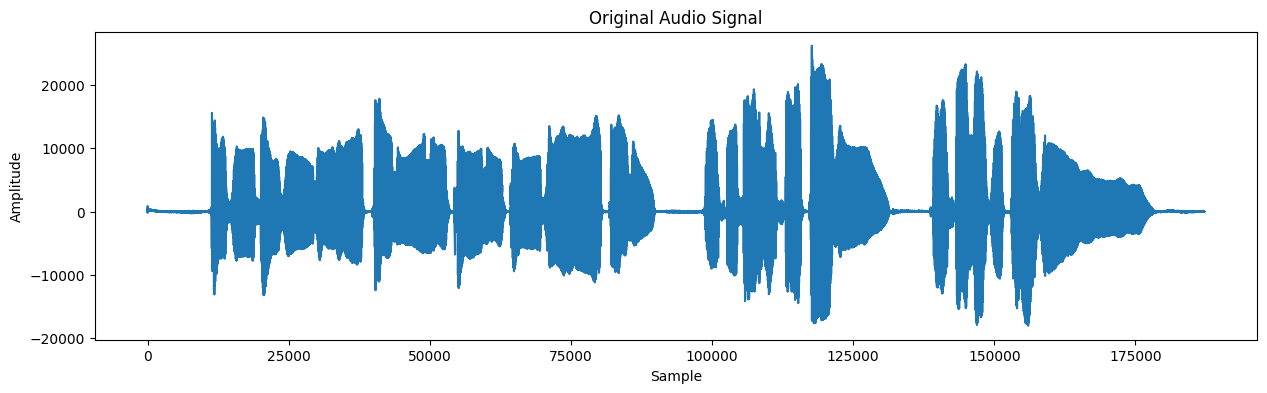

In [15]:
plt.figure(figsize=(15, 4))
plt.title("Original Audio Signal")
plt.plot(inp)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

### Five Columns

In [16]:
fs_rir, rir = wav.read("Five_Columns_Long_16k.wav")

In [17]:
inp = inp / np.max(np.abs(inp))
rir_left = rir[:, 0]
rir_right = rir[:, 1]

In [18]:
out_left = manual_convolution(inp, rir_left)
out_right = manual_convolution(inp, rir_right)

In [19]:
out = np.vstack((out_left, out_right)).T

In [23]:
out = out / np.max(np.abs(out))  # Normalize to -1 to 1
out = (out * 32767).astype(np.int16)  # Convert to 16-bit PCM range

In [28]:
wav.write("manual_convolution_five_columns.wav", fs_inp, out)

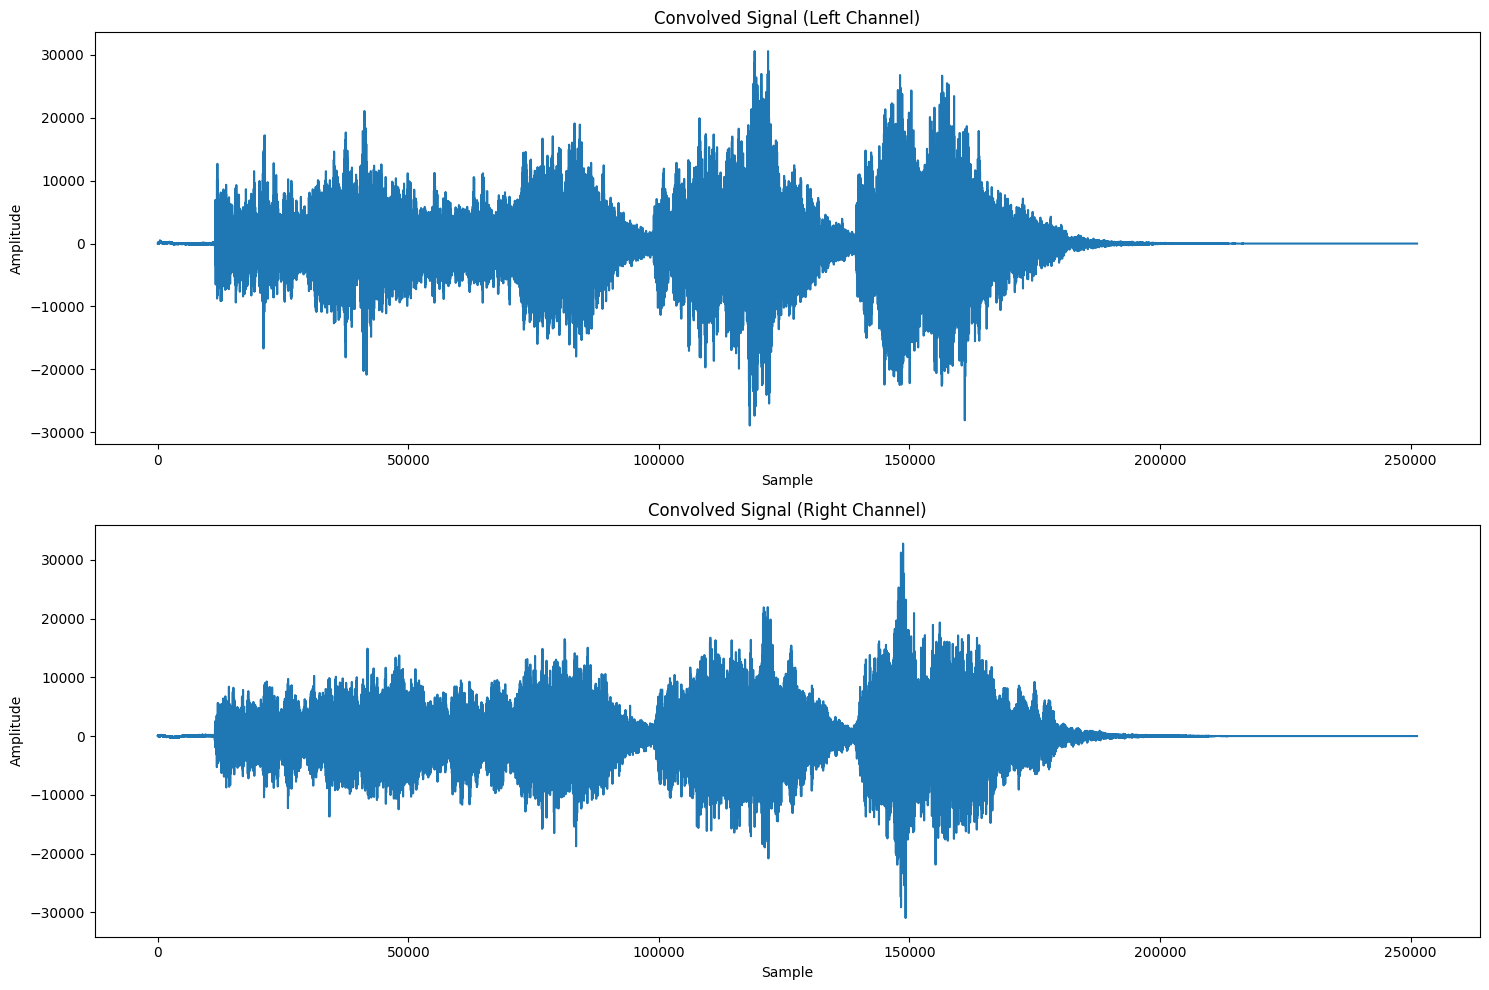

In [29]:
plt.figure(figsize=(15, 10))

# Plot convolved signal (Left Channel)
plt.subplot(2, 1, 1)
plt.title("Convolved Signal (Left Channel)")
plt.plot(out[:, 0])
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Plot convolved signal (Right Channel)
plt.subplot(2, 1, 2)
plt.title("Convolved Signal (Right Channel)")
plt.plot(out[:, 1])
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

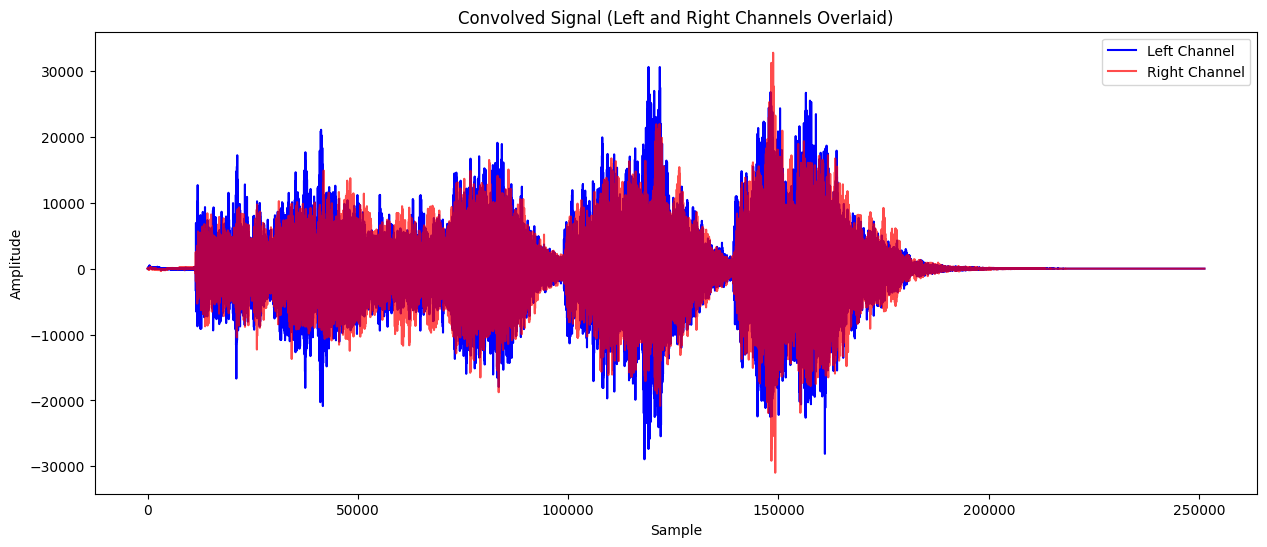

In [30]:
plt.figure(figsize=(15, 6))
plt.title("Convolved Signal (Left and Right Channels Overlaid)")
plt.plot(out[:, 0], label='Left Channel', color='blue')
plt.plot(out[:, 1], label='Right Channel', color='red', alpha=0.7)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

### Long Echo Hall

In [32]:
fs_rir, rir = wav.read("long_echo_hall_16k.wav")

In [33]:
def convolve_fft(signal, rir_channel):
    return fftconvolve(signal, rir_channel, mode='full')

In [34]:
rir_left = rir[:, 0]
rir_right = rir[:, 1]

In [36]:
from scipy.signal import fftconvolve
out_left = convolve_fft(inp, rir_left)
out_right = convolve_fft(inp, rir_right)

In [37]:
out = np.vstack((out_left, out_right)).T

In [38]:
out = out / np.max(np.abs(out))

In [47]:
wav.write("fft_convolve_long_echo_hall.wav", fs_inp, (out * 32767).astype(np.int16))

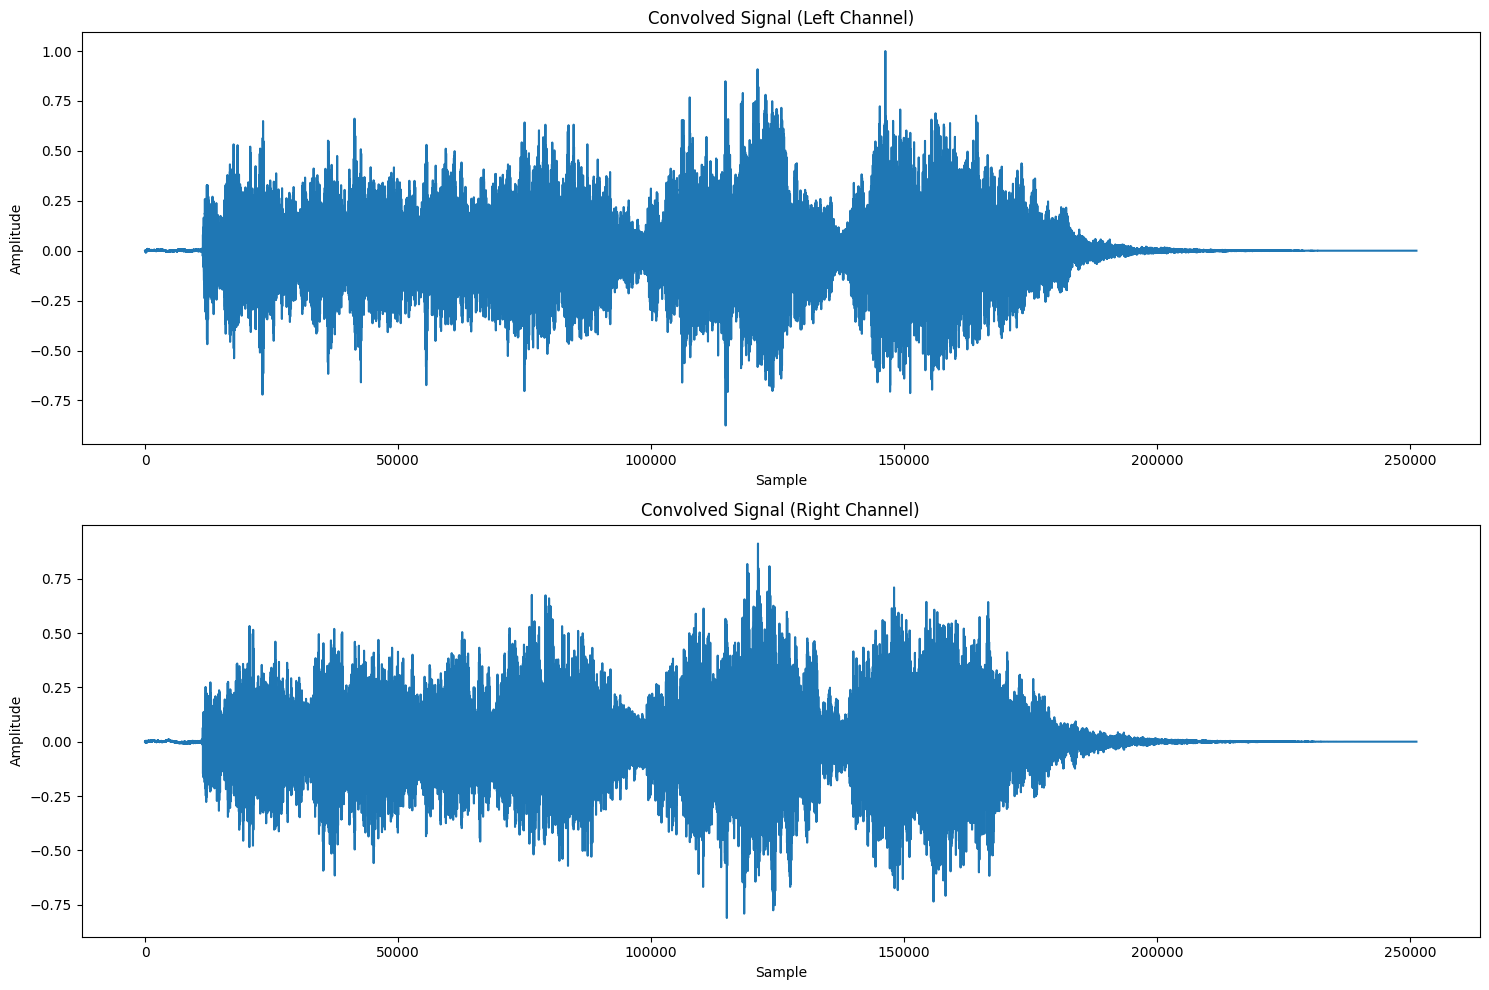

In [48]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.title("Convolved Signal (Left Channel)")
plt.plot(out[:, 0])
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.title("Convolved Signal (Right Channel)")
plt.plot(out[:, 1])
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

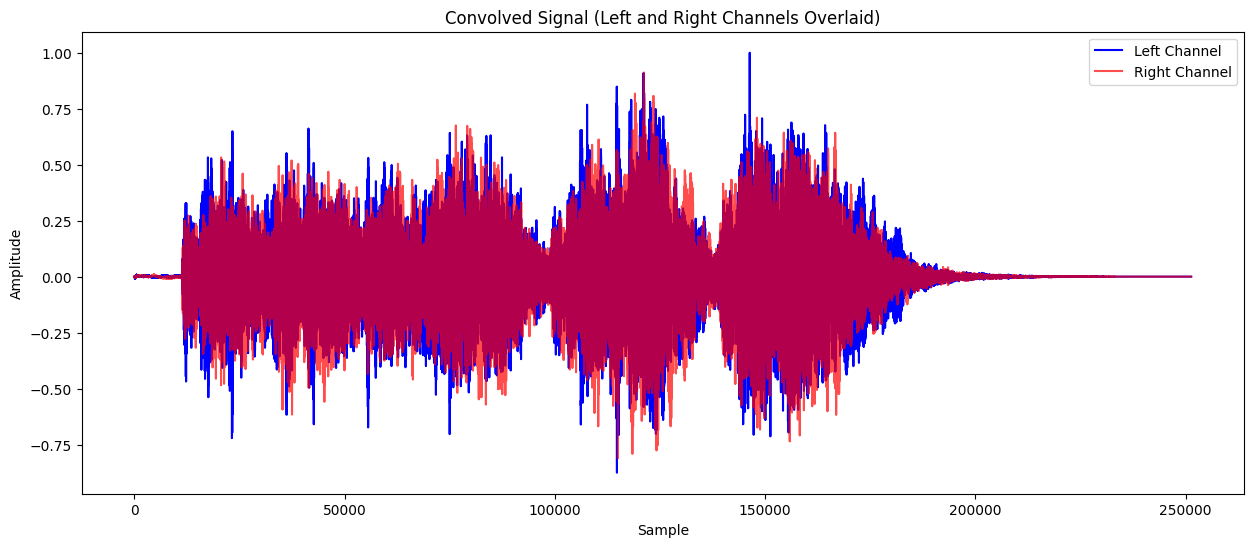

In [49]:
plt.figure(figsize=(15, 6))
plt.title("Convolved Signal (Left and Right Channels Overlaid)")
plt.plot(out[:, 0], label='Left Channel', color='blue')
plt.plot(out[:, 1], label='Right Channel', color='red', alpha=0.7)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

### Parking Garage

In [50]:
fs_rir, rir = wav.read("parking_garage_16k.wav")

In [51]:
rir_left = rir[:, 0]
rir_right = rir[:, 1]

In [52]:
out_left = convolve_fft(inp, rir_left)
out_right = convolve_fft(inp, rir_right)

In [53]:
out = np.vstack((out_left, out_right)).T

In [54]:
out = out / np.max(np.abs(out))

In [55]:
wav.write("fft_convolve_parking_garage.wav", fs_inp, (out * 32767).astype(np.int16))

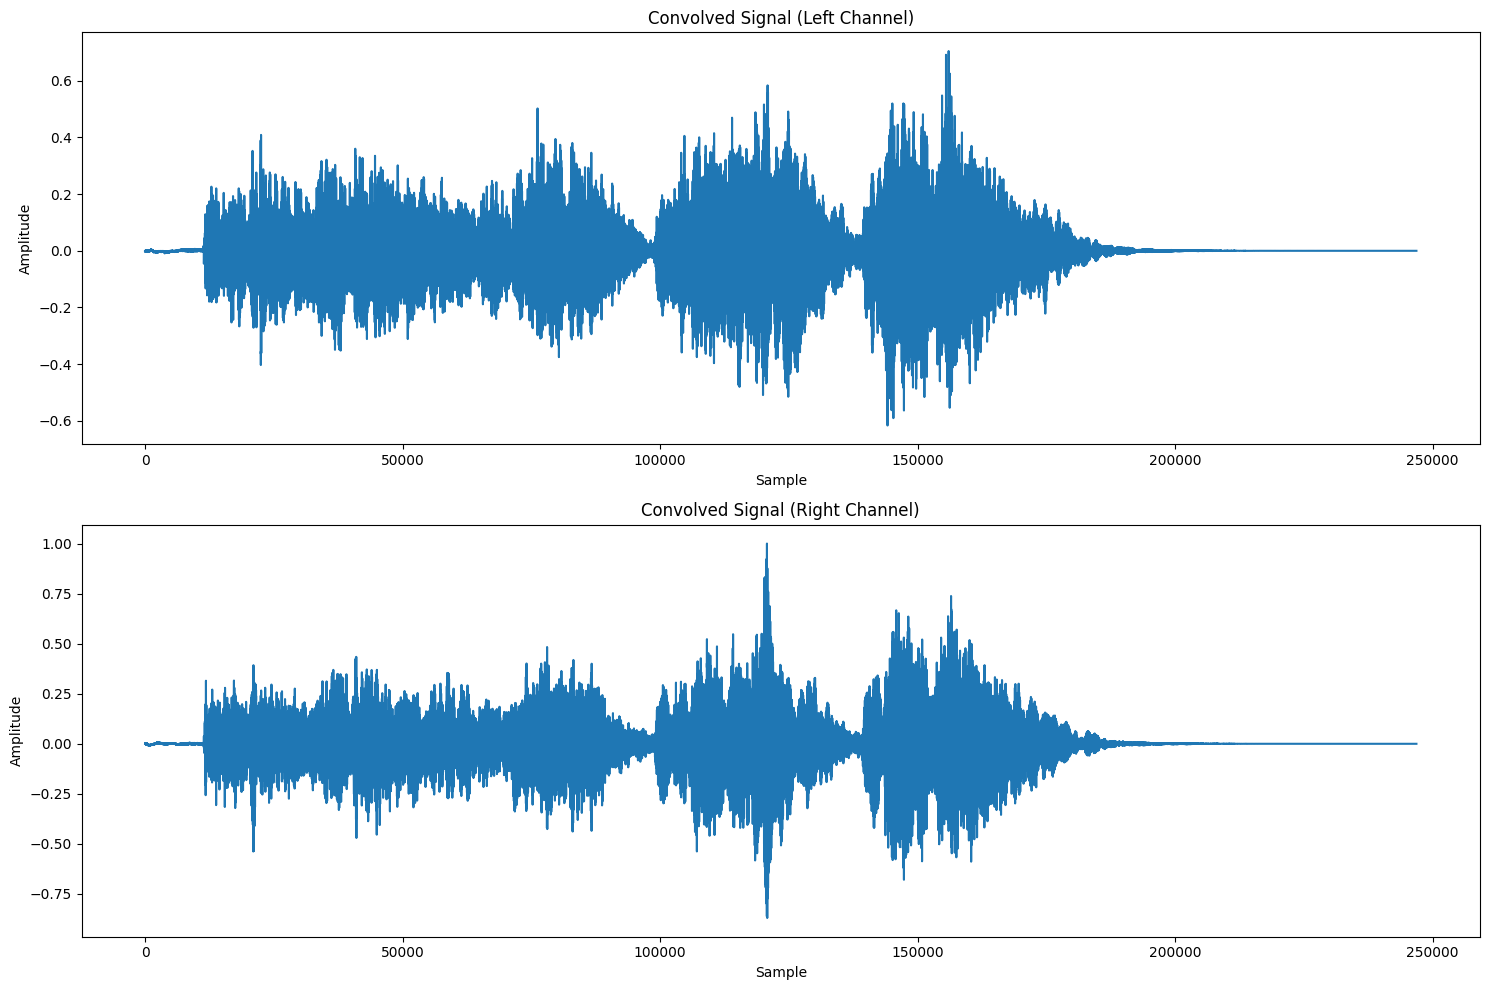

In [56]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.title("Convolved Signal (Left Channel)")
plt.plot(out[:, 0])
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.title("Convolved Signal (Right Channel)")
plt.plot(out[:, 1])
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

Exception ignored in: <function Wave_write.__del__ at 0x0000016784364C20>
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\wave.py", line 465, in __del__
    self.close()
  File "C:\ProgramData\anaconda3\Lib\wave.py", line 583, in close
    self._ensure_header_written(0)
  File "C:\ProgramData\anaconda3\Lib\wave.py", line 606, in _ensure_header_written
    self._write_header(datasize)
  File "C:\ProgramData\anaconda3\Lib\wave.py", line 618, in _write_header
    self._file.write(struct.pack('<L4s4sLHHLLHH4s',
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
struct.error: 'H' format requires 0 <= number <= 65535


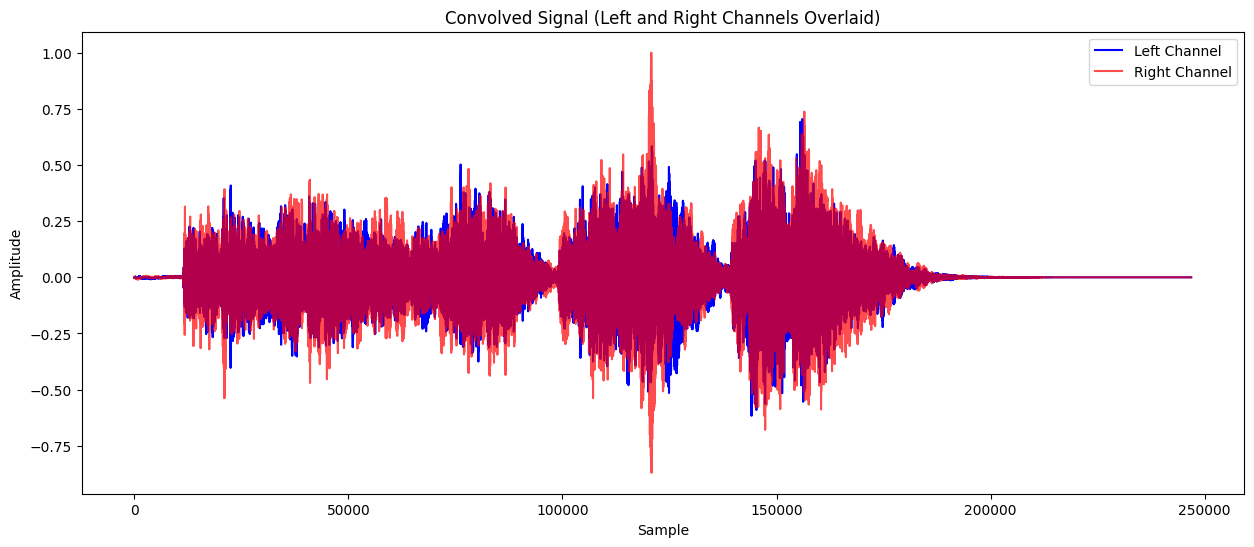

In [57]:
plt.figure(figsize=(15, 6))
plt.title("Convolved Signal (Left and Right Channels Overlaid)")
plt.plot(out[:, 0], label='Left Channel', color='blue')
plt.plot(out[:, 1], label='Right Channel', color='red', alpha=0.7)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.show()